In [11]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display


# Problem Parameters
a = - np.pi
b = np.pi


def u(x):
    return np.sin(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.sin(x * 2 * np.pi / (b - a))

In [12]:
# Parameters
d = 1
k = 1
delta = 2.
ncentres = np.linspace(10, 100, 10, dtype=int)

# Computed Parameters
phi = rad.Wendland(d, k)

# Integration
integrator = rad.integrate.TrapezoidIntegrator(a, b, 5000)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Data Recording
results = np.zeros((ncentres.size, 2))

prog = IntProgress(min=0, max=ncentres.size)
display(prog)
for i, n in enumerate(ncentres):
    centres = np.linspace(a, b, n)
    
    # Solve for approximate solution
    solver = rad.solve.HelmholtzBaseSolver(phi, centres, delta, integrator)
    approx = solver.solve(f)
    error = rad.error(u, approx, error_integrator)
    
    results[i, 0] = error
    results[i, 1] = solver.cond()    

    prog.value += 1
    
prog.close()

IntProgress(value=0, max=10)

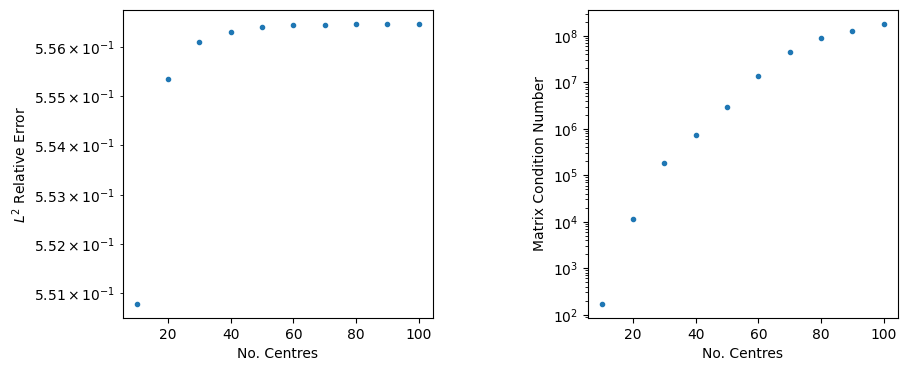

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("No. Centres")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(ncentres, results[:, 0], '.')

axs[1].set_xlabel("No. Centres")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(ncentres, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()